In [36]:
clc, clear all

# Energy Management in Building

## 0. Introduction

In this report, we present the results that we obtained after analyzing the thermical behavior of a building. The aim of this exercice is to create a virtual model representing our building in order to run the thermical simulation with a simplified model. 

First, we are going to describe our building, its location, geometry, use and materials. We will then define the hypothesis used to make the simplified model. After that, we will define the conditions needed to run the model, such as the local weather, the internal sources (occupants, electronic devices, lightings) and the heating/ventilation system. 

In a second part, we are going to draw the diagram that we will use to defined the terms of the different matrices needed to run the calculations. This diagram is supposed to schematize the thermical behaviour of the building. We will do it with different steps : each one will add a difficulty to the model, such as a heating and ventilation system and the orientation and the direction of the sun rays. We will also explain why we made different choices to modelise/discretise some materials compared to others. 

We used a Matlab program to run the calculations, the code will be presented all along this report in order to be able to run it here directly.

In a last part, we will implemant the model in DesignBuilder in order to compare the results with our calculations from Matlab (Temperature differences between inside and outside, and power needed to maintain an acceptable temperature inside the building). We will also try to change some parameters in order to improve the building energy consumption, such as different heating system, changing the thickness of the materials or adding some solar protections.


## 1. Building Description

### 1.1 Location

The building we are going to work on is located in Dijon, in France.

<img src="dijon.png" alt="drawing" width="400"/>

### 1.2 Space and geometry
We decided to work on a workspace, with a room with two desks (25,9 m2) and a kitchen (10,1 m2). It is a rectangular plan with a large glass wall (1,2 cm of argon between two 0,4 cm glasses) facing North and 3 insulated brick walls (22 cm of bricks, 18 cm of wood wool insulation and 10,5 cm of exterior brick cladding). There is also one wood door (5 cm) to the outside, one wood door (5 cm) in the partition wall and an other window with the same thickness than the glass wall. The partition wall is composed of plaster with no insulation (5,4 cm of air between two BA13). 
Here is the plan : 

<img src="PLAN_projet.png" alt="drawing" width="800"/>

We are supposed, in a second part, to modelise our workspace on DesignBuilder in order to compare the results. The height of the ceiling is 2,5 m. 
Here is the 3D model obtained :

<img src="Vue 3D.png" alt="drawing" width="800"/>

We considered the workspace to be on the ground floor, with sufficient insulation in order to consider there is no flow passing through the floor. We also consider that there is the same workspace on the 1st floor of the building, with the same caracteristics and inside temperature than ours, so there is also no flow between our workspace and the upper floor.

### 1.3 Materials' properties and others needed values


Here is the list of the different materials we chose to use in this project, with their thickness and caracteristics : 


| Material | Thickness (m) | Thermal conductivity (W/mK) | Density (kg/m3) | Specific heat (J/(kg.K)) |
| ----------- | ----------- | ----------- | ----------- | ----------- | 
| Structural brick wall | 0,22 | 0,72 | 1920 | 840 | 
| Cladding (bricks) | 0,105 | 0,72 | 1920 | 840 | 
| Wood wool insulation | 0,18 | 0,1 | 500 | 1000 | 
| Plaster | 0,013 | 0,25 | 900 | 1000 | 
| Glass | 0,004 | 1 | 2500 | 750 | 
| Argon | 0,012 | 0,017 | 1,7 | 519 | 
| Air | 0,054 | 0,024 | 1,225 | 1004 | 
| Wood door | 0,05 | 0,19 | 700 | 2390 |



The surfaces and volumes are given in the next tables : 


| Type of panel | Surface (m2) |
| ----------- | ----------- |
| Total surface of office's wall | 23,20 |
| Total surface of kitchen's wall | 15,40 |
| Surface of glass wall in the office part | 15,95 |
| Surface of glass wall in the kitchen part | 6,40 |
| Surface of the window | 1,50 |
| Surface of one door | 1,80 |
| Surface of one plaster board | 8,20 |



| Type of space | Volume (m3) |
| ----------- | ----------- |
| Air of the office | 23,20 |
| Air of the kitchen | 15,40 |




The coefficient convection are the following : 

ho = 10 W/(m2.K) for the outside

hi = 10 W/(m2.K) for the inside


We also take the air inflitration into account.   
We define the flows between the office and the ouside at 10.7 m3/h and the flows between the kitchen and the ouside at 4.8m3/h. 


In [37]:
% width (m) 

w_brick_in = 0.22; 
w_brick_out = 0.105; 
w_insulation = 0.18; 
w_door = 0.05; 
w_plaster = 0.013; 
w_glass = 0.004; 
w_argon = 0.012; 
w_air = 0.054;% on néglige l'effet isolant de l'air dans la paroi.  

% Surfaces (en m2) 

S_wall = 35.125; 
S_wall_office = 2.5*(4+0.5+1.1+2.9)+1.5+0.5*0.9; 
S_wall_kitchen = 2.5*(0.96+0.6+4)+1.5; 
S_glasswall_kitchen = 6.4; 
S_glasswall_office = 15.95; 
S_window = 1.5; 
S_door = 2*0.9; 
S_plaster = 8.2; 

V_air_kitchen = 2.5*10; 
V_air_office = 2.5*25; 

% Thermal conductivity (en W/mK) 

l_brick = 0.72; 
l_insulation = 0.1; 
l_glass = 1; 
l_wood =  0.19; 
l_plaster = 0.25; 
l_argon = 0.017; 
l_air = 0.024; 

% specific heat (J/(kg.K)) 

cp_brick = 840; 
cp_insulation = 1000; 
cp_wood = 2390; 
cp_glass = 750; 
cp_air = 1004; 
cp_argon = 519; 
cp_plaster = 1000; 

% density (kg/m3) 

d_brick = 1920; 
d_insulation = 500; 
d_wood = 700; 
d_plaster = 900; 
d_glass = 2500; 
d_air = 1.225;  
d_argon = 1.7; 

% convection coefficients[W/m2 K] 

ho = 10;    hi = 4; 

%air infiltration 

vio = 10.7 ; %m3/h 
vik = 4.8 ; %m3/h 
mio = d_air*vio/3600; 
mik = d_air*vik/3600; 


%% Thermal capacity  (J/K) 

C_brick_in_kitchen = d_brick*cp_brick*w_brick_in*S_wall_kitchen; 
C_brick_out_kitchen = d_brick*cp_brick*w_brick_out*S_wall_kitchen; 
C_brick_in_office = d_brick*cp_brick*w_brick_in*S_wall_office; 
C_brick_out_office = d_brick*cp_brick*w_brick_out*S_wall_office; 
C_insulation_office = d_insulation*cp_insulation*w_insulation*S_wall_office; 
C_insulation_kitchen = d_insulation*cp_insulation*w_insulation*S_wall_kitchen; 
C_wood = d_wood*cp_wood*w_door*S_door; 
C_glass = d_glass*cp_glass*w_glass*S_window; 
C_glasswall_kitchen = d_glass*cp_glass*w_glass*S_glasswall_kitchen; 
C_glasswall_office = d_glass*cp_glass*w_glass*S_glasswall_office; 
C_plaster = d_plaster*cp_plaster*S_plaster*w_plaster; 
C_argon_glasswall_kitchen = d_argon*cp_argon*w_argon*S_glasswall_kitchen; 
C_argon_glasswall_office = d_argon*cp_argon*w_argon*S_glasswall_office; 
C_argon_window = d_argon*cp_argon*w_argon*S_window; 
C_air_plaster = d_air*cp_air*S_plaster*0.54; 
C_air_kitchen = d_air*cp_air*V_air_kitchen; 
C_air_office = d_air*cp_air*V_air_office; 

## 2. General hypothesis for modeling

1. We only have 1D thermal Exchange, because the thickness of the wall is small compared to the height and the width of the space.
2. We use the inside surface of the walls instead of the outside ones to neglect the thermical bridges.
3. All the external walls have the same composition and same characteristics.
4. There is no flow between the ground, the upper floor and our workspace.
5. There is no conduction at the junction between walls and glass, because the variation is negligible.
6. The density and the capacity of the air are identical in each room.
7. The flow absorbed by the window is not neglected.
8. We neglect reflected radiations.
9. For dynamic simulations : initial temperatures will be set to a value located within the comfort temperature range of the season being modelled. For winter simulations, the initial temperature will be set at 16°C (the comfort range is between 16°C and 21°C). For summer simulations, it will be 25°C (the comfort range is between 20°C and 25°C).
10. Direct shortwaves are uniformly dispatched on the vertical surfaces only, proportionally to their surface.
11. We neglect the surface of the window and entrance door for the shape factor calculations of the walls. 
12. We neglect the thermal bridges.
13. In order to limitate the time of calculation of the code, we are considering the heating capacity of the windows (argon + glasses) and of the air contained in the partition walls equal to 0 since they are neglictable. 
14.  We neglect the air inflitration between the kitchen and the office.  

## 3. Conditions to run the model



We will only model "extreme" weather : summer and winter. Indeed, our aim is not to precisely calculate heat losses on a real building, but rather to determinate and evaluate ways to optimise a design during extreme conditions. Consumptions and temperatures will be calculated on 31 days of summer (starting from the 1st of July) and 30 days of winter (starting from the 1st of January).

### 3.1 Local weather

Our building is located in Dijon : we will use the weather data sheet corresponding. We will collect all the input contained in this file with the function fReadWeather, so we will be able to get the changing values of outside temperature and radiation depending on the time.

In [38]:
% meteo 

 

% winter data 
    periodW = 15*24; 
    fromW =  0; 
    TcminW = 16; 
    TcmaxW = 21; % Bornes T consignes 
    TciW = 18; %T initial 

% summer data
    periodS = 15*24; 
    fromS = 6*30*24;  
    TcminS = 20; 
    TcmaxS = 25; 
    TciS = 23; 


[TimeS,TempS,RadNDirS,RadHDifS,WDirS,WSpeedS,monthS,dayS,hourS,minuteS] = fReadWeather('FRA_DIJON_IWEC.csv',fromS,periodS); 


### 3.2 Internal sources

We defined that the internal sources were composed of the heating coming from the electronic devices, the lightings and the occupants. In the office space, the power density is 11,70 W/m2, for a total of 299 W, and for the kitchen we have 42,24 W/m2 for a total of 426,6 W.

### 3.3 Heating and ventilation system

We will not consider a heating and ventilation system since we just want to verify that the program works and then compare the results with DesignBuilder, but we will calculate the charges that are necessary if we want to had a heating system. 

## 4. Diagram

### 4.1 Model

We have two areas : the work space and the kitchen, that are separated by a partition wall. 


<img src="Diagramme.png" alt="drawing" width="1200"/>

### 4.2 Precisions on discretisation

Depending on the thickness and of the nature of the material, we chose different ways to discretise the volumes : 
- For the windows, since the glass is really thin, we chose to discretise like in the following scheme : 

<img src="Vitre-03.png" alt="drawing" width="800"/>

- For the outside walls, we chose to increase the number of discretisation for the insulation anbd the structural brick since they are pretty thick compared to the cladding :

<img src="Mur-02.png" alt="drawing" width="800"/>


## 5. 1st Simulation

The simulation will be done thanks to the model we draw in the previous chapter. We name 𝜃 the temperature of the nodes, e the temperature differences over resistances, q the heat flow through resistances and f the external fluxes.

In this part, we will not consider the orientation in the building. This caracteristic will be implemented il the following part. 

To solve the system, we had to solve the following equativo, which can be linked whith the previous pattern.

<img src="equation.png" alt="drawing" width="300"/>


The C-matrix respresents the capacity of the different surfaces. 
The A-matrix represents how a flow is connected to nodes. 
The G-matrix represents the conductances of the surfaces (conduction or convection). 
The b-matrix respresents the temperatures imposed in the system. 
The f-matrix represents the heat flow sources imposed in the system. 
 
 The matrix A, C and G are not time depending, we are gonna test and verify the coherence of the results of the Matlab code in static state before implementing the matrix f and b.


### 5.1 Definition of the matrix A, C and G

#### 5.1.1 Linking matrix A

We use the model presented before to create the linking matrix A. 
Beforehand we’ve decided the direction of each flow from each branch of the diagram. If the path from the branch to the node is in the same direction as the flow, the corresponding coefficient in the A-matrix will be 1. If the flow is in the opposite direction, the coefficient will be -1. We used for loops in order to modelise repetitive logical schemes (for the discretisation of a wall for example).

In [39]:
%% matrice A 

A = zeros(60,51); 
A(1,1) = 1; 
for i = (2:10)  
    A(i,[i-1 i])= [-1,1]; 
end 

for i = (11:15) 
    A(i,[i i-1])= [-1,1]; 
end 

A(16,15) = 1; 
A(17,[10 16])= [1 -1]; 

for i =(18:19) 
    A(i,[i-1 i-2])= [-1,1]; 
end  

A(20,18) = 1; 
A(22,[10 19])= [1 -1]; 

for i = (23:26) 
    A(i,[i-4 i-3]) = [1 -1]; 
end 

A(27,23)=1; 
A(28,[10 24])=[-1,1]; 
A(29,[24 25])=[-1 1]; 
A(30,[51 26])=[-1 1]; 
A(31,[26 30]) = [-1 1]; 
A(32,[10 27])=[-1 1]; 

for i= (33:35) 
    A(i,[i-6 i-5]) = [-1 1]; 
end 

A(36,31)=1; 

for i=(37:44) 
    A(i,[i-6 i-5])= [-1 1]; 
end 

A(45,[39 30])=[-1 1]; 
A(46,40)=1; 

for i = (47:50) 
    A(i,[i-7 i-6]) = [-1 1]; 
end 

A(51,[44 30])= [-1 1]; 
A(52,45)=1; 

for i = (53:56) 
    A(i,[i-8 i-7])= [-1 1]; 
end 

A(57,[49 30])=[-1 1]; 

%partition wall error corection 

A(21,[25 50])=[-1 1]; 
A(58,[50 51])=[-1 1]; 
  

%air infiltrations 

A(59,10) = 1; 
A(60,30) = 1; 


#### 5.1.2 Capacities matrix C

We then use the values calculated before to create the capacities matrix. This matrice is defined depending on our choices of dimensions and materials : 

In [40]:
%% Capacities matrix 

C=zeros(1,51); 
  
%office 
%wall office 

C(2)=C_brick_out_office; 
C(7)=C_brick_in_office/2 ;C(8)=C(7); 
C(4)= C_insulation_office/2; C(5)=C(4); 
C(10)= C_air_office; 
  
%glass wall office 

C(12) = C_glasswall_office/2 ; C(14)=C(12); 
C(13)= 0; %C_argon_glasswall_office; 

%office door 

C(17)= C_wood; 

%window office 

C(20)= C_glass ; C(22)=C(20); 
C(21)= 0; %C_argon_window; 

%bond 
%partition wall 

C(25)= C_plaster ; C(51)=C(25); 
C(50)=0; %C_air_plaster; 

%door 

C(28)=C_wood; 

%kitchen 
%wall kitchen 

C(32)=C_brick_out_kitchen; 
C(37)=C_brick_in_kitchen/2 ; C(38)=C(37); 
C(34)= C_insulation_kitchen/2 ; C(35)=C(34); 
C(30)= C_air_kitchen; 

%glass wall kitchen 

C(41) = C_glasswall_office ; C(43)=C(41); 
C(42)=0; %C_argon_glasswall_office; 

%window kitchen 

C(46)= C_glass ; C(48)=C(46); 
C(47)= 0;%C_argon_window; 

C = diag(C); 

We first tried to take the capacity of the air of the partitionnal wall and the capacity of the double glazing into account but because there are very low compare to the others capacities of the building, we deceide to put them at 0. It alllowed us to increase from 3.75 to 450 second the time step calculation because dtmax is much less restrictive if the very small capacity are neglected. We won time in each calculation.  

#### 5.1.3 Conductance matrix G

The conductance is the reverse of the resistance for each surface. This matrice is also defined by our choices of dimensions and materials.

In [41]:
%% Resistances  

% outside wall office 

R1 = 1/(ho*S_wall_office);  
R2 = (w_brick_out/2)/(l_brick*S_wall_office); R3 = R2; 
R4 = (w_insulation/4)/(l_insulation*S_wall_office); R6 = R4; 
R5 = (w_insulation/2)/(l_insulation*S_wall_office); 
R7 = (w_brick_in/4)/(l_brick*S_wall_office); R9 = R7; 
R8 = (w_brick_in/2)/(l_brick*S_wall_office); 
R10 = 1/(hi*S_wall_office);  

% Glass Wall 

R11 = 1/(hi*S_glasswall_office); 
R12 = (w_glass/2)/(l_glass*S_glasswall_office); R15 = R12; 
R13 = (w_glass/2)/(l_glass*S_glasswall_office) + (w_argon/2)/(l_argon*S_glasswall_office); R14 = R13; 
R16 = 1/(ho*S_glasswall_office);  

%Wood door  

R17 = 1/(hi*S_door); 
R18 = (w_door/2)/(l_wood*S_door); R19 = R18; 
R20 = 1/(ho*S_door); 

%Electronic devices + occupants R21 et R58 
%Window  

R22 = 1/(hi*S_window); R57 = R22; 
R23 = (w_glass/2)/(l_glass*S_window); R26 = R23; R56 = R23; R53 = R26; 
R24 = (w_glass/2)/(l_glass*S_window) + (w_argon/2)/(l_argon*S_window);R25 = R24; R55 = R24; R54 = R25; 
R27 = 1/(ho*S_window); R52 = R27; 

%Partition wall 

R28 = 1/(hi*S_plaster); R31 = R28; 
R29 = (w_plaster/2)/(l_plaster*S_plaster); R30 = R29; 
R21 = (w_plaster/2)/(l_plaster*S_plaster) + (w_air/2)/(l_air*S_plaster); R58 = R21; 

%inside door 

R32 = 1/(hi*S_door); R35 = R32; 
R33 = (w_door/2)/(l_wood*S_door); R34 = R33; 

%Outside wall kitchen 

R36 = 1/(ho*S_wall_kitchen); 
R37 = (w_brick_out/2)/(l_brick*S_wall_kitchen); R38 = R37; 
R39 = (w_insulation/4)/(l_insulation*S_wall_kitchen); R41 = R39; 
R40 = (w_insulation/2)/(l_insulation*S_wall_kitchen); 
R42 = (w_brick_in/4)/(l_brick*S_wall_office); R44 = R42; 
R43 = (w_brick_in/2)/(l_brick*S_wall_kitchen); 
R45 = 1/(hi*S_wall_kitchen);  

%Glasswall kitchen  

R46 = 1/(ho*S_glasswall_kitchen); 
R47 = (w_glass/2)/(l_glass*S_glasswall_kitchen); R50 = R47; 
R48 = (w_glass/2)/(l_glass*S_glasswall_kitchen) + (w_argon/2)/(l_argon*S_glasswall_kitchen); R49 = R48; 
R51 = 1/(hi*S_glasswall_kitchen); 
R59 = mio*cp_air; 
R60 = mik*cp_air; 

Rvect = [R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25,R26,R27,R28,R29,R30,R31,R32,R33,R34,R35,R36,R37,R38,R39,R40,R41,R42,R43,R44,R45,R46,R47,R48,R49,R50,R51,R52,R53,R54,R55,R56,R57,R58,R59,R60]; 

Gvect = []; 

for i = (1:60) 
    Gvect(i) = 1/Rvect(i); 
end 

G = diag(Gvect); 

### 5.2 Stady state simulation

#### 5.2.1 TC to SS

Explication Thibaut + expliquer le time step
Matrix f et b

To resolve the equation, we have to 


In [42]:
% matrix f of solar radiation, energy production, and outputs (heat flow sources) 
fi = zeros(51,1); 
for i = [1 9 10 11 15 16 18 19 23 24 26 27 29 30 31 39 40 44 45 49] 
    fi(i) = 1; 
end  

yi = zeros(51,1); yi(10) = 1; yi(30) = 1; 

% matrix b of constant temperatures sources 
% We have put a value of temperature for the branchs which are connected to a temperature (outside temperature for example). 
bi= zeros(60,1); 

for i = [1 20 16 27 36 46 52 59 60] 
    bi(i)=1; 
end 

% TC to SS 
[As,Bs,Cs,Ds] = fTC2SS(A,G,bi,C,fi,yi); 

dtmax=min(-2./eig(As))
dt = 450; %[s] 

dtmax = 500.68


#### 5.2.2 Simulation with T0 = 1°C

In [43]:
%% simulation with T0 = 1°C, no f 

duration = 3600*30*24 ;   % [s] time duration  
n = floor(duration/dt); % no of time samples 

TimeSS = 0:dt:(n-1)*dt;   % time 
nth = size(As,1);       % no of state variables 
th = zeros(nth,n);      % zero initial conditions 
u = zeros(29,n);         % u = [To To To Tsp Phio Phii Qaux Phia] 
u(1:9,:) = ones(9,n);   % To = step variation 

for i = 1:nth 
th(i,1)= 0; 
end 

for k = 1:n-1 
th(:,k+1) = (eye(nth) + dt*As)*th(:,k) + dt*Bs*u(:,k); 
end 

y = Cs*th + Ds*u; 

Here are the results obtained that verifies the coherence of the code : 

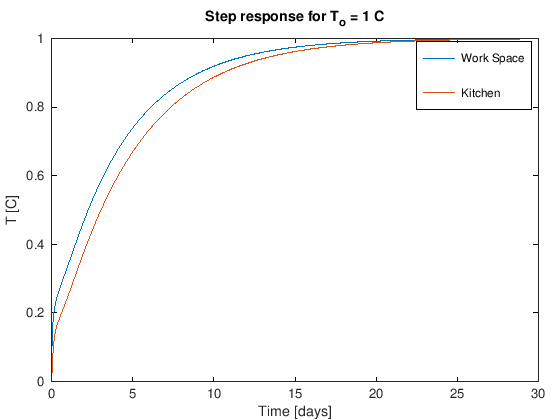

In [44]:
plot(TimeSS/(24*3600),y)  
legend({'Work Space','Kitchen'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Step response for T_o = 1 C')

The result of 15 days to reach the final temperature is consistent but show that our building has an important thermal resistance. 

### 5.3 Dynamic Simulation

After we checked the code in the static state, we are runing the code in dynamic.

#### 5.3.1 Solar radiation, energy production and output matrix f (in summer)

We have put a value for the nodes where there is a source (electronic devices, occupants and lightings in a room) and we define all the flows required multiplying of the radiation (taken from the weather file) of the surface (of the wall, the glasswall, the window etc...) and the absorption of the materials. We also take into account the radiation through the windows that reach the inside of the walls and warm the rooms. The transmittance of the glass is therefore also define. 

In [45]:
f=zeros(20,periodS); 
E = (RadNDirS'+RadHDifS')./3600; 
abs_glass = 0.2; tau_glass=0.6; 
abs_wall = 0.6; 
abs_door = 0.5; 
abs_plaster = 0.3; 
%size(RadNDir)

f(1,:) = E *S_wall_office*abs_wall; %1 
f(2,:) = E *abs_wall* S_glasswall_office*tau_glass*(S_wall_office/(S_wall_office+S_plaster+2*S_door+S_window))+... 
       E *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_office);%9 
f(4,:) = E *abs_glass* S_window*tau_glass*S_glasswall_office/(2.5*4.7+S_plaster+S_door+S_glasswall_office); %11 
f(5,:) = E *S_glasswall_office*abs_glass ;%15 
f(6,:) = E *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window));%16 
f(7,:) = E *abs_door*S_door;%18 
f(8,:) = E *abs_glass* S_glasswall_office*tau_glass*(S_window/(S_wall_office+S_plaster+2*S_door+S_window));%19 
f(9,:) = E *S_window*abs_glass; %23 
f(10,:) =E *abs_plaster*S_glasswall_office*tau_glass*(S_plaster/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E *abs_plaster*S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %24 
f(11,:) = E *abs_plaster* S_glasswall_kitchen*tau_glass*(S_plaster/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E *abs_plaster* S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%26 
f(12,:) = E *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %27 
f(13,:) =  E *abs_door* S_glasswall_kitchen*tau_glass*(S_door/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%29 
f(15,:) = E *S_wall_kitchen*abs_wall;  %31 
f(16,:) =E *abs_wall* S_glasswall_kitchen*tau_glass*(S_wall_kitchen/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
       E *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen); %39 
f(17,:) = E *S_glasswall_kitchen*abs_glass; %40 
f(18,:) = E *abs_glass* S_window*tau_glass*S_glasswall_kitchen/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen);%44 
f(19,:) = E *S_window*abs_glass; %45 
f(20,:) = E *abs_glass* S_glasswall_kitchen*tau_glass*(S_window/(S_wall_kitchen+S_plaster+S_door+S_window));%49 
f(3,:) = 100; %10 Electronic + occupants + lightings 
f(14,:) = 100; %30 Electronic + occupants + lightings 

#### 5.3.2 Dynamic simulation in summer

In [46]:
% interpolate data for time step dt 
%size(Temp)
%size(Time)
Temp1 = interp1(TimeS, TempS, [TimeS(1):dt:TimeS(end)]'); 

ffS = zeros(20,length([TimeS(1):dt:TimeS(end)])); 
for i = 1:20 
     ffS(i,:) = interp1(TimeS, f(i,:), [TimeS(1):dt:TimeS(end)]'); 
end 

Time45 = [TimeS(1):dt:TimeS(end)]'; 

% u implementation 
uS = [ Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 ffS']; 
uS=uS'; 

% Memory alocation and initial value 

n = size(Time45,1); 
thS = zeros(nth,n); 
for i = 1:nth 
thS(i,1)= TciS; 
end 

Here are the results : 

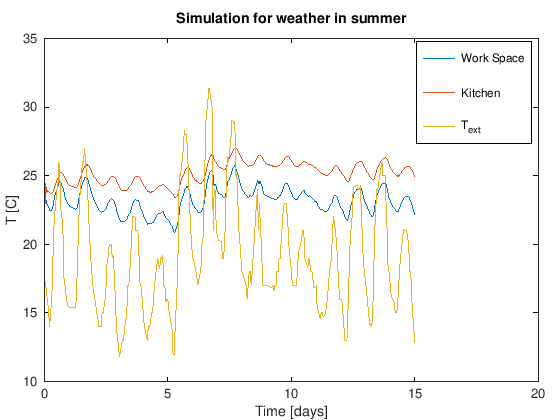

In [47]:
for k = 1:n-1 
thS(:,k+1) = (eye(nth) + dt*As)*thS(:,k) + dt*Bs*uS(:,k); 
end

yS = Cs*thS + Ds*uS; 

plot(Time45/(24*3600),yS,Time45/(24*3600),Temp1) 
legend({'Work Space','Kitchen','T_{ext}'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Simulation for weather in summer') 
%size(As)
%size(Bs)


## 6. 2nd Simulation

### 6.1 Calculations with the orientation in summer

In this part, we are going to take in account the orientation of the building, as indicated on the following plan : 

<img src="PLAN_projet.png" alt="drawing" width="800"/>

In order to do this, we manage to divise the radiation flows according to the four direction thanks to the fonction fSolRadTiltSurf  by changing the entry Z  (azimut in deg) ; north (180°), south (0°), east (-90°) and west (90°).  

We neglect reflected radiation inside the building. 


In [48]:
dt = 450;
[Time,Temp,RadNDir,RadHDif,WDir,WSpeed,month,day,hour,minute] = fReadWeather('FRA_DIJON_IWEC.csv',fromS,periodS); 

% SWL radiations + auxiliary sources (electrical, persons, etc.)  
B = 90;  L = 45; albedo = 0.2; 

Z = 0; 
[PhiDirS, PhiDifS, PhiRefS] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_south = (PhiDirS' + PhiDifS' + PhiRefS'); 

Z = 90; 
[PhiDirW, PhiDifW, PhiRefW] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_west = (PhiDirW' + PhiDifW' + PhiRefW'); 

Z = 180; 
[PhiDirN, PhiDifN, PhiRefN] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_north = (PhiDirN' + PhiDifN' + PhiRefN'); 

Z = -90; 
[PhiDirE, PhiDifE, PhiRefE] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_east = (PhiDirE' + PhiDifE' + PhiRefE'); 


#### 6.1.1 Graph of the radiation over 15 days in summer

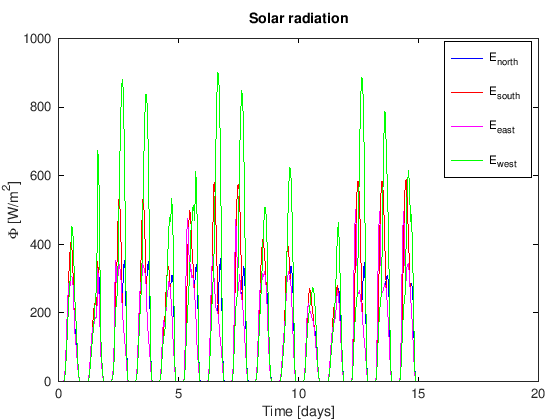

In [49]:
plot(Time/(24*3600), E_north,'b'), hold on  
plot(Time/(24*3600), E_south,'r')   
plot(Time/(24*3600), E_east,'m')   
plot(Time/(24*3600), E_west,'g')   
xlabel('Time [days]'), ylabel('\Phi [W/m^2]') 
legend('E_{north}','E_{south}', 'E_{east}', 'E_{west}') ;
title('Solar radiation') 

#### 6.1.2 Simulation with the orientation in summer

Then we have to redefine the radiation flows of the matrix f to precise which radiation flows reach which surface.  

Concerning the wall that are distributed on two orientations, like the brick wall of the kitchen and the one of the office, we had to make an avarage between the power arrived on each side according to the surface of each orientation.  

Note : the number commented after each radiation calculation correspond to the node on which the radiation arrive (cf resistance pattern) 

In [50]:
f=zeros(20,periodS);
abs_glass = 0.2; tau_glass=0.6;
abs_wall = 0.6;
abs_door = 0.5;
abs_plaster = 0.3;
f(1,:) = ((E_south*(S_wall_office-4.5*2.5)+E_east*4.7*2.5)/S_wall_office)*S_wall_office*abs_wall; %1 
f(2,:) = E_north *abs_wall* S_glasswall_office*tau_glass*(S_wall_office/(S_wall_office+S_plaster+2*S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_office);%9 
f(4,:) = E_north *abs_glass*S_window*tau_glass*S_glasswall_office/(2.5*4.7+S_plaster+S_door+S_glasswall_office); %11 
f(5,:) = E_south *S_glasswall_office*abs_glass ;%15 
f(6,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window));%16 
f(7,:) = E_south *abs_door*S_door;%18 
f(8,:) = E_north *abs_glass* S_glasswall_office*tau_glass*(S_window/(S_wall_office+S_plaster+2*S_door+S_window));%19 
f(9,:) = E_south *S_window*abs_glass; %23 
f(10,:) =E_north *abs_plaster*S_glasswall_office*tau_glass*(S_plaster/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_plaster*S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %24     
f(11,:) = E_north *abs_plaster* S_glasswall_kitchen*tau_glass*(S_plaster/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_plaster* S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%26 
f(12,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %27 
f(13,:) = E_north *abs_door* S_glasswall_kitchen*tau_glass*(S_door/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%29 
f(15,:) = ((E_west*4.7*2.5+E_south*(S_wall_kitchen-4.7*2.5))/S_wall_kitchen)*S_wall_kitchen*abs_wall;  %31 
f(16,:) =E_north *abs_wall* S_glasswall_kitchen*tau_glass*(S_wall_kitchen/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen); %39 
f(17,:) = E_north *S_glasswall_kitchen*abs_glass; %40 
f(18,:) = E_south *abs_glass* S_window*tau_glass*S_glasswall_kitchen/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen);%44 
f(19,:) = E_south *S_window*abs_glass; %45 
f(20,:) = E_north *abs_glass* S_glasswall_kitchen*tau_glass*(S_window/(S_wall_kitchen+S_plaster+S_door+S_window));%49 

A heating flow is also define because of the electronic device, the lighting systems and the occupants of each room.  They are define as follow, only in some hour of the day.  

 

In [51]:
for i = (0:periodS/24-1) 
f(3, 24*i+8:24*i+20) = 299; %10 
f(14, 24*i+12:24*i+14) = 426.6; %30 
end 

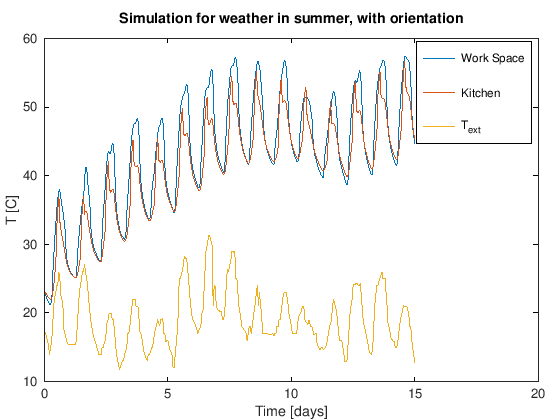

In [52]:
% interpolate data for time step dt 
Temp1 = interp1(Time, Temp, [Time(1):dt:Time(end)]'); 
ffSO = zeros(20,length([Time(1):dt:Time(end)])); 
for i = 1:20 
     ffSO(i,:) = interp1(Time, f(i,:), [Time(1):dt:Time(end)]'); 
end 
Time45 = [Time(1):dt:Time(end)]'; 

% u implementation 

uSO = [ Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 ffSO']; 
uSO=uSO';  

% Memory alocation and initial value 

n = size(Time45,1); 
thSO = zeros(nth,n); 
for i = 1:nth 
thSO(i,1)= TciS; 
end 

for k = 1:n-1 
thSO(:,k+1) = (eye(nth) + dt*As)*thSO(:,k) + dt*Bs*uSO(:,k); 
end 

ySO = Cs*thSO + Ds*uSO; 

%subplot(3,1,2) 
plot(Time45/(24*3600),ySO,Time45/(24*3600),Temp1)
legend({'Work Space','Kitchen','T_{ext}'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Simulation for weather in summer, with orientation') 

#### 6.1.3 Comparison with Design Builder in summer

#### 6.1.4 Simulation with the orientation in winter

In [53]:
dt = 450;
[Time,Temp,RadNDir,RadHDif,WDir,WSpeed,month,day,hour,minute] = fReadWeather('FRA_DIJON_IWEC.csv',fromW,periodW); 

% SWL radiations + auxiliary sources (electrical, persons, etc.)  
B = 90;  L = 45; albedo = 0.2; 

Z = 0; 
[PhiDirS, PhiDifS, PhiRefS] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_south = (PhiDirS' + PhiDifS' + PhiRefS'); 

Z = 90; 
[PhiDirW, PhiDifW, PhiRefW] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_west = (PhiDirW' + PhiDifW' + PhiRefW'); 

Z = 180; 
[PhiDirN, PhiDifN, PhiRefN] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_north = (PhiDirN' + PhiDifN' + PhiRefN'); 

Z = -90; 
[PhiDirE, PhiDifE, PhiRefE] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_east = (PhiDirE' + PhiDifE' + PhiRefE'); 

In [54]:
f=zeros(20,periodW);
abs_glass = 0.2; tau_glass=0.6;
abs_wall = 0.6;
abs_door = 0.5;
abs_plaster = 0.3;
f(1,:) = ((E_south*(S_wall_office-4.5*2.5)+E_east*4.7*2.5)/S_wall_office)*S_wall_office*abs_wall; %1 
f(2,:) = E_north *abs_wall* S_glasswall_office*tau_glass*(S_wall_office/(S_wall_office+S_plaster+2*S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_office);%9 
f(4,:) = E_north *abs_glass*S_window*tau_glass*S_glasswall_office/(2.5*4.7+S_plaster+S_door+S_glasswall_office); %11 
f(5,:) = E_south *S_glasswall_office*abs_glass ;%15 
f(6,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window));%16 
f(7,:) = E_south *abs_door*S_door;%18 
f(8,:) = E_north *abs_glass* S_glasswall_office*tau_glass*(S_window/(S_wall_office+S_plaster+2*S_door+S_window));%19 
f(9,:) = E_south *S_window*abs_glass; %23 
f(10,:) =E_north *abs_plaster*S_glasswall_office*tau_glass*(S_plaster/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_plaster*S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %24     
f(11,:) = E_north *abs_plaster* S_glasswall_kitchen*tau_glass*(S_plaster/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_plaster* S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%26 
f(12,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %27 
f(13,:) = E_north *abs_door* S_glasswall_kitchen*tau_glass*(S_door/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%29 
f(15,:) = ((E_west*4.7*2.5+E_south*(S_wall_kitchen-4.7*2.5))/S_wall_kitchen)*S_wall_kitchen*abs_wall;  %31 
f(16,:) =E_north *abs_wall* S_glasswall_kitchen*tau_glass*(S_wall_kitchen/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen); %39 
f(17,:) = E_north *S_glasswall_kitchen*abs_glass; %40 
f(18,:) = E_south *abs_glass* S_window*tau_glass*S_glasswall_kitchen/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen);%44 
f(19,:) = E_south *S_window*abs_glass; %45 
f(20,:) = E_north *abs_glass* S_glasswall_kitchen*tau_glass*(S_window/(S_wall_kitchen+S_plaster+S_door+S_window));%49 

for i = (0:periodW/24-1) 
f(3, 24*i+8:24*i+20) = 299; %10 
f(14, 24*i+12:24*i+14) = 426.6; %30 
end 

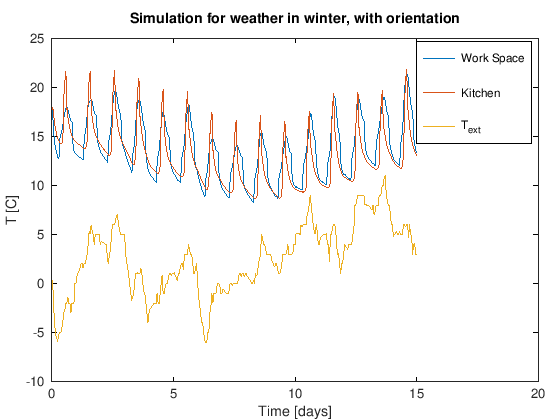

In [55]:
% interpolate data for time step dt 
Temp1 = interp1(Time, Temp, [Time(1):dt:Time(end)]'); 
ffWO = zeros(20,length([Time(1):dt:Time(end)])); 
for i = 1:20 
     ffWO(i,:) = interp1(Time, f(i,:), [Time(1):dt:Time(end)]'); 
end 
Time45 = [Time(1):dt:Time(end)]'; 

% u implementation 

uWO = [ Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 ffWO']; 
uWO=uWO';  

% Memory alocation and initial value 

n = size(Time45,1); 
thWO = zeros(nth,n); 
for i = 1:nth 
thWO(i,1)= TciW; 
end 

for k = 1:n-1 
thWO(:,k+1) = (eye(nth) + dt*As)*thWO(:,k) + dt*Bs*uWO(:,k); 
end 

yWO = Cs*thWO + Ds*uWO; 

plot(Time45/(24*3600),yWO,Time45/(24*3600),Temp1) 
legend({'Work Space','Kitchen','T_{ext}'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Simulation for weather in winter, with orientation') 

### 6.2 Estimation of the energy used with a heating and a cooling system

#### 6.2.1 Estimation of the energy used by the heating system in winter

First, we calculate our data in winter with a thiner time step, because the method that we use to estimate the energy used is not efficient if the time step is to wide

In [56]:
dt=10 ;%[s]

[Time,Temp,RadNDir,RadHDif,WDir,WSpeed,month,day,hour,minute] = fReadWeather('FRA_DIJON_IWEC.csv',fromW,periodW); 
 
B = 90;  L = 45; albedo = 0.2; 

Z = 0; 
[PhiDirS, PhiDifS, PhiRefS] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_south = (PhiDirS' + PhiDifS' + PhiRefS'); 

Z = 90; 
[PhiDirW, PhiDifW, PhiRefW] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_west = (PhiDirW' + PhiDifW' + PhiRefW'); 

Z = 180; 
[PhiDirN, PhiDifN, PhiRefN] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_north = (PhiDirN' + PhiDifN' + PhiRefN'); 

Z = -90; 
[PhiDirE, PhiDifE, PhiRefE] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_east = (PhiDirE' + PhiDifE' + PhiRefE'); 


f=zeros(20,periodW);
abs_glass = 0.2; tau_glass=0.6;
abs_wall = 0.6;
abs_door = 0.5;
abs_plaster = 0.3;
f(1,:) = ((E_south*(S_wall_office-4.5*2.5)+E_east*4.7*2.5)/S_wall_office)*S_wall_office*abs_wall; %1 
f(2,:) = E_north *abs_wall* S_glasswall_office*tau_glass*(S_wall_office/(S_wall_office+S_plaster+2*S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_office);%9 
f(4,:) = E_north *abs_glass*S_window*tau_glass*S_glasswall_office/(2.5*4.7+S_plaster+S_door+S_glasswall_office); %11 
f(5,:) = E_south *S_glasswall_office*abs_glass ;%15 
f(6,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window));%16 
f(7,:) = E_south *abs_door*S_door;%18 
f(8,:) = E_north *abs_glass* S_glasswall_office*tau_glass*(S_window/(S_wall_office+S_plaster+2*S_door+S_window));%19 
f(9,:) = E_south *S_window*abs_glass; %23 
f(10,:) =E_north *abs_plaster*S_glasswall_office*tau_glass*(S_plaster/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_plaster*S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %24     
f(11,:) = E_north *abs_plaster* S_glasswall_kitchen*tau_glass*(S_plaster/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_plaster* S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%26 
f(12,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %27 
f(13,:) = E_north *abs_door* S_glasswall_kitchen*tau_glass*(S_door/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%29 
f(15,:) = ((E_west*4.7*2.5+E_south*(S_wall_kitchen-4.7*2.5))/S_wall_kitchen)*S_wall_kitchen*abs_wall;  %31 
f(16,:) =E_north *abs_wall* S_glasswall_kitchen*tau_glass*(S_wall_kitchen/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen); %39 
f(17,:) = E_north *S_glasswall_kitchen*abs_glass; %40 
f(18,:) = E_south *abs_glass* S_window*tau_glass*S_glasswall_kitchen/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen);%44 
f(19,:) = E_south *S_window*abs_glass; %45 
f(20,:) = E_north *abs_glass* S_glasswall_kitchen*tau_glass*(S_window/(S_wall_kitchen+S_plaster+S_door+S_window));%49 

for i = (0:periodW/24-1) 
f(3, 24*i+8:24*i+20) = 299; %10 
f(14, 24*i+12:24*i+14) = 426.6; %30 
end 

n = floor(duration/dt);
thWH = zeros(nth,n); 
uWH = zeros(29,n);        

% interpolate data for time step dt 

Temp1 = interp1(Time, Temp, [Time(1):dt:Time(end)]'); 


ffWH = zeros(20,length([Time(1):dt:Time(end)])); 
for i = 1:20 
     ffWH(i,:) = interp1(Time, f(i,:), [Time(1):dt:Time(end)]'); 
end 

Time1 = [Time(1):dt:Time(end)]'; 

% u implementation 
uWH = [ Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 ffWH']; 
uWH=uWH'; 

TotalConsoWH_kWh = 29.106


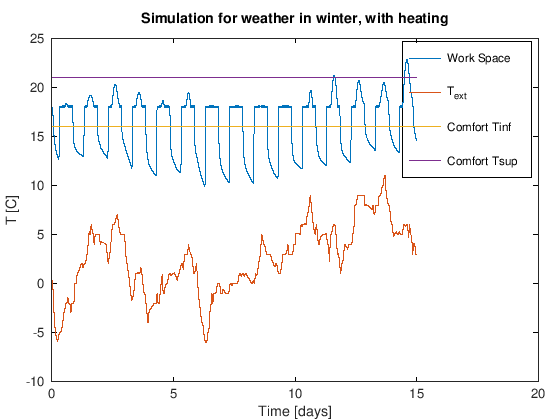

In [57]:
% Memory alocation and initial value 

n = size(Time1,1); 
thWH = zeros(nth,n); 
for i = 1:nth 
thWH(i,1)= TciW; 
end 

uWHp = uWH ;
ConsWH=0;
for k = 1:n-1 
thWH(:,k+1) = (eye(nth) + dt*As)*thWH(:,k) + dt*Bs*uWHp(:,k); 
if all([thWH(6,k+1)< TciW, mod((k+1)*periodW/n,24)<=20,mod((k+1)*periodW/n,24)>= 7 ])
    uWHp(12,k+1)=299+1000;
    ConsWH = ConsWH + 1000*dt;
end
end 

yWH = Cs*thWH + Ds*uWH; 

TotalConsoWH_kWh = ConsWH/3600000
%subplot(3,1,2) 
plot(Time1/(24*3600),yWH(1,:),Time1/(24*3600),Temp1,[0,periodW/24],[TcminW,TcminW],[0,periodW/24],[TcmaxW,TcmaxW]) 
legend({'Work Space','T_{ext}','Comfort Tinf','Comfort Tsup'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Simulation for weather in winter, with heating') 

#### 6.2.1 Estimation of the energy used by the cooling system in summer

In [58]:
dt=10 ;%[s]

[Time,Temp,RadNDir,RadHDif,WDir,WSpeed,month,day,hour,minute] = fReadWeather('FRA_DIJON_IWEC.csv',fromS,periodS); 
 
B = 90;  L = 45; albedo = 0.2; 

Z = 0; 
[PhiDirS, PhiDifS, PhiRefS] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_south = (PhiDirS' + PhiDifS' + PhiRefS'); 

Z = 90; 
[PhiDirW, PhiDifW, PhiRefW] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_west = (PhiDirW' + PhiDifW' + PhiRefW'); 

Z = 180; 
[PhiDirN, PhiDifN, PhiRefN] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_north = (PhiDirN' + PhiDifN' + PhiRefN'); 

Z = -90; 
[PhiDirE, PhiDifE, PhiRefE] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_east = (PhiDirE' + PhiDifE' + PhiRefE'); 


f=zeros(20,periodS);
abs_glass = 0.2; tau_glass=0.6;
abs_wall = 0.6;
abs_door = 0.5;
abs_plaster = 0.3;
f(1,:) = ((E_south*(S_wall_office-4.5*2.5)+E_east*4.7*2.5)/S_wall_office)*S_wall_office*abs_wall; %1 
f(2,:) = E_north *abs_wall* S_glasswall_office*tau_glass*(S_wall_office/(S_wall_office+S_plaster+2*S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_office);%9 
f(4,:) = E_north *abs_glass*S_window*tau_glass*S_glasswall_office/(2.5*4.7+S_plaster+S_door+S_glasswall_office); %11 
f(5,:) = E_south *S_glasswall_office*abs_glass ;%15 
f(6,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window));%16 
f(7,:) = E_south *abs_door*S_door;%18 
f(8,:) = E_north *abs_glass* S_glasswall_office*tau_glass*(S_window/(S_wall_office+S_plaster+2*S_door+S_window));%19 
f(9,:) = E_south *S_window*abs_glass; %23 
f(10,:) =E_north *abs_plaster*S_glasswall_office*tau_glass*(S_plaster/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_plaster*S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %24     
f(11,:) = E_north *abs_plaster* S_glasswall_kitchen*tau_glass*(S_plaster/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_plaster* S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%26 
f(12,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %27 
f(13,:) = E_north *abs_door* S_glasswall_kitchen*tau_glass*(S_door/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%29 
f(15,:) = ((E_west*4.7*2.5+E_south*(S_wall_kitchen-4.7*2.5))/S_wall_kitchen)*S_wall_kitchen*abs_wall;  %31 
f(16,:) =E_north *abs_wall* S_glasswall_kitchen*tau_glass*(S_wall_kitchen/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen); %39 
f(17,:) = E_north *S_glasswall_kitchen*abs_glass; %40 
f(18,:) = E_south *abs_glass* S_window*tau_glass*S_glasswall_kitchen/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen);%44 
f(19,:) = E_south *S_window*abs_glass; %45 
f(20,:) = E_north *abs_glass* S_glasswall_kitchen*tau_glass*(S_window/(S_wall_kitchen+S_plaster+S_door+S_window));%49 

for i = (0:periodS/24-1) 
f(3, 24*i+8:24*i+20) = 299; %10 
f(14, 24*i+12:24*i+14) = 426.6; %30 
end 

n = floor(duration/dt);
thSC = zeros(nth,n); 
uSC = zeros(29,n);        

% interpolate data for time step dt 

Temp1 = interp1(Time, Temp, [Time(1):dt:Time(end)]'); 


ffSC = zeros(20,length([Time(1):dt:Time(end)])); 
for i = 1:20 
     ffSC(i,:) = interp1(Time, f(i,:), [Time(1):dt:Time(end)]'); 
end 

Time1 = [Time(1):dt:Time(end)]'; 

% u implementation 
uSC = [ Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 ffSC']; 
uSC=uSC'; 

TotalConsoSC_kWh = 262.93


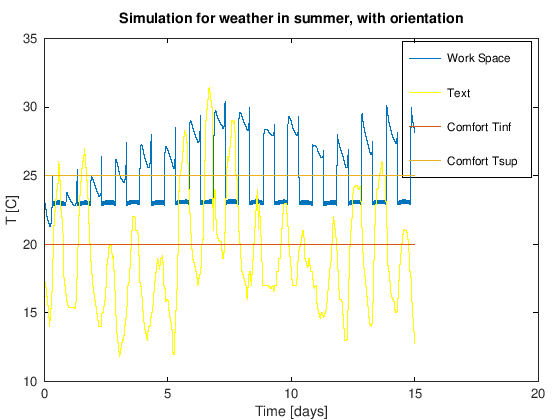

In [59]:
% Memory alocation and initial value 

n = size(Time1,1); 
thSC = zeros(nth,n); 
for i = 1:nth 
thSC(i,1)= TciS; 
end 

uSCp = uSC;
ConsSC=0;
for k = 1:n-1 
thSC(:,k+1) = (eye(nth) + dt*As)*thSC(:,k) + dt*Bs*uSCp(:,k); 
if all([thSC(6,k+1)> TciS, mod((k+1)*periodS/n,24)<=20,mod((k+1)*periodS/n,24)>= 7 ])
    uSCp(12,k+1)=299-2000;
    ConsSC = ConsSC + 2000*dt;
end
end 

ySC = Cs*thSC + Ds*uSC; 

TotalConsoSC_kWh = ConsSC/3600000
%subplot(3,1,2) 
plot(Time1/(24*3600),ySC(1,:),Time1/(24*3600),Temp1,'y',[0,periodS/24],[TcminS,TcminS],[0,periodS/24],[TcmaxS,TcmaxS]) 
legend({'Work Space','Text','Comfort Tinf','Comfort Tsup'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Simulation for weather in summer, with orientation') 

#### 6.2.2 Comparison with Design Builder

## 7. Improvements

In this final part, we are going to propose some improvement in order to attain the target temperature in summer and in winter.

### 7.1 Tinted glass-wall : principle 
Thanks to DesignBuilder, we know that the solar gains are a very important factor in the fluctuation of temperature, eventhough our glass-wall is north-oriented : 

<img src="?.png" alt="drawing" width="600"/>

So we decided to add blinds on this glass-wall, in order to limit the diffuse solar gains, and see if the difference is noticable. 

TRANSFORMER TRANSMITANCE EN REFLEXION


In [60]:
dt=10 ;%[s]

[Time,Temp,RadNDir,RadHDif,WDir,WSpeed,month,day,hour,minute] = fReadWeather('FRA_DIJON_IWEC.csv',fromW,periodW); 
 
B = 90;  L = 45; albedo = 0.2; 

Z = 0; 
[PhiDirS, PhiDifS, PhiRefS] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_south = (PhiDirS' + PhiDifS' + PhiRefS'); 

Z = 90; 
[PhiDirW, PhiDifW, PhiRefW] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_west = (PhiDirW' + PhiDifW' + PhiRefW'); 

Z = 180; 
[PhiDirN, PhiDifN, PhiRefN] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_north = (PhiDirN' + PhiDifN' + PhiRefN'); 

Z = -90; 
[PhiDirE, PhiDifE, PhiRefE] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_east = (PhiDirE' + PhiDifE' + PhiRefE'); 


f=zeros(20,periodW);
abs_glass = 0.2; tau_glass=0.2;
abs_wall = 0.6;
abs_door = 0.5;
abs_plaster = 0.3;
f(1,:) = ((E_south*(S_wall_office-4.5*2.5)+E_east*4.7*2.5)/S_wall_office)*S_wall_office*abs_wall; %1 
f(2,:) = E_north *abs_wall* S_glasswall_office*tau_glass*(S_wall_office/(S_wall_office+S_plaster+2*S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_office);%9 
f(4,:) = E_north *abs_glass*S_window*tau_glass*S_glasswall_office/(2.5*4.7+S_plaster+S_door+S_glasswall_office); %11 
f(5,:) = E_south *S_glasswall_office*abs_glass ;%15 
f(6,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window));%16 
f(7,:) = E_south *abs_door*S_door;%18 
f(8,:) = E_north *abs_glass* S_glasswall_office*tau_glass*(S_window/(S_wall_office+S_plaster+2*S_door+S_window));%19 
f(9,:) = E_south *S_window*abs_glass; %23 
f(10,:) =E_north *abs_plaster*S_glasswall_office*tau_glass*(S_plaster/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_plaster*S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %24     
f(11,:) = E_north *abs_plaster* S_glasswall_kitchen*tau_glass*(S_plaster/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_plaster* S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%26 
f(12,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %27 
f(13,:) = E_north *abs_door* S_glasswall_kitchen*tau_glass*(S_door/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%29 
f(15,:) = ((E_west*4.7*2.5+E_south*(S_wall_kitchen-4.7*2.5))/S_wall_kitchen)*S_wall_kitchen*abs_wall;  %31 
f(16,:) =E_north *abs_wall* S_glasswall_kitchen*tau_glass*(S_wall_kitchen/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen); %39 
f(17,:) = E_north *S_glasswall_kitchen*abs_glass; %40 
f(18,:) = E_south *abs_glass* S_window*tau_glass*S_glasswall_kitchen/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen);%44 
f(19,:) = E_south *S_window*abs_glass; %45 
f(20,:) = E_north *abs_glass* S_glasswall_kitchen*tau_glass*(S_window/(S_wall_kitchen+S_plaster+S_door+S_window));%49 

for i = (0:periodW/24-1) 
f(3, 24*i+8:24*i+20) = 299; %10 
f(14, 24*i+12:24*i+14) = 426.6; %30 
end 

n = floor(duration/dt);
uWB = zeros(29,n);        

% interpolate data for time step dt 

Temp1 = interp1(Time, Temp, [Time(1):dt:Time(end)]'); 


ffWB = zeros(20,length([Time(1):dt:Time(end)])); 
for i = 1:20 
     ffWB(i,:) = interp1(Time, f(i,:), [Time(1):dt:Time(end)]'); 
end 

Time1 = [Time(1):dt:Time(end)]'; 

% u implementation 
uWB = [ Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 ffWB']; 
uWB=uWB'; 

During 2 weaks in winter, we consume 42.0111 kWH instead of 29.1056 kWH before using tinted glasses 


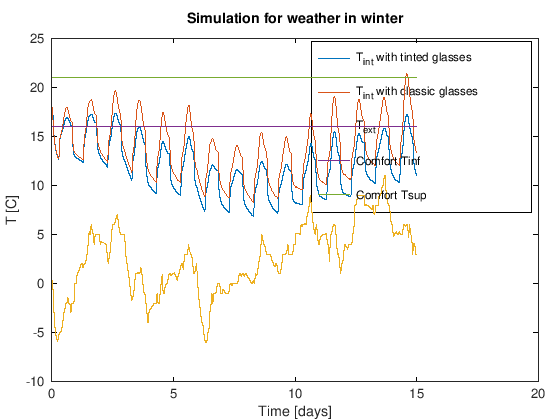

In [61]:
% Memory alocation and initial value 

n = size(Time1,1); 
thWHB = zeros(nth,n); 
thWB = zeros(nth,n);
for i = 1:nth 
thWHB(i,1)= TciW; 
thWB(i,1)= TciW;
end 

uWBp = uWB ;
ConsWHB=0;
for k = 1:n-1 
thWHB(:,k+1) = (eye(nth) + dt*As)*thWHB(:,k) + dt*Bs*uWBp(:,k); 
thWB(:,k+1)=(eye(nth) + dt*As)*thWB(:,k) + dt*Bs*uWB(:,k); 
if all([thWHB(6,k+1)< TciW, mod((k+1)*periodW/n,24)<=20,mod((k+1)*periodW/n,24)>= 8 ])
    uWBp(12,k+1)=299+1000;
    ConsWHB = ConsWHB + 1000*dt;
end
end 

yWB = Cs*thWB + Ds*uWB; 

TotalConsoWHB_kWh = ConsWHB/3600000;
fprintf('During 2 weaks in winter, we consume %d kWH instead of %d kWH before using tinted glasses \n', TotalConsoWHB_kWh, TotalConsoWH_kWh)
%subplot(3,1,2) 
plot(Time1/(24*3600),yWB(1,:),Time45/(24*3600),yWO(1,:),Time1/(24*3600),Temp1,[0,periodW/24],[TcminW,TcminW],[0,periodW/24],[TcmaxW,TcmaxW]) 
legend({'T_{int} with tinted glasses','T_{int} with classic glasses','T_{ext}','Comfort Tinf','Comfort Tsup'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Simulation for weather in winter') 

In [62]:
dt=10 ;%[s]

[Time,Temp,RadNDir,RadHDif,WDir,WSpeed,month,day,hour,minute] = fReadWeather('FRA_DIJON_IWEC.csv',fromS,periodS); 
 
B = 90;  L = 45; albedo = 0.2; 

Z = 0; 
[PhiDirS, PhiDifS, PhiRefS] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_south = (PhiDirS' + PhiDifS' + PhiRefS'); 

Z = 90; 
[PhiDirW, PhiDifW, PhiRefW] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_west = (PhiDirW' + PhiDifW' + PhiRefW'); 

Z = 180; 
[PhiDirN, PhiDifN, PhiRefN] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_north = (PhiDirN' + PhiDifN' + PhiRefN'); 

Z = -90; 
[PhiDirE, PhiDifE, PhiRefE] = fSolRadTiltSurf(month, day, hour, minute, ... 
  RadNDir, RadHDif, B, Z, L, albedo); 
E_east = (PhiDirE' + PhiDifE' + PhiRefE'); 


f=zeros(20,periodS);
abs_glass = 0.2; tau_glass=0.2;
abs_wall = 0.6;
abs_door = 0.5;
abs_plaster = 0.3;
f(1,:) = ((E_south*(S_wall_office-4.5*2.5)+E_east*4.7*2.5)/S_wall_office)*S_wall_office*abs_wall; %1 
f(2,:) = E_north *abs_wall* S_glasswall_office*tau_glass*(S_wall_office/(S_wall_office+S_plaster+2*S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_office);%9 
f(4,:) = E_north *abs_glass*S_window*tau_glass*S_glasswall_office/(2.5*4.7+S_plaster+S_door+S_glasswall_office); %11 
f(5,:) = E_south *S_glasswall_office*abs_glass ;%15 
f(6,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window));%16 
f(7,:) = E_south *abs_door*S_door;%18 
f(8,:) = E_north *abs_glass* S_glasswall_office*tau_glass*(S_window/(S_wall_office+S_plaster+2*S_door+S_window));%19 
f(9,:) = E_south *S_window*abs_glass; %23 
f(10,:) =E_north *abs_plaster*S_glasswall_office*tau_glass*(S_plaster/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_plaster*S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %24     
f(11,:) = E_north *abs_plaster* S_glasswall_kitchen*tau_glass*(S_plaster/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_plaster* S_window*tau_glass*(S_plaster/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%26 
f(12,:) = E_north *abs_door* S_glasswall_office*tau_glass*(S_door/(S_wall_office+S_plaster+2*S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_office)); %27 
f(13,:) = E_north *abs_door* S_glasswall_kitchen*tau_glass*(S_door/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
        E_south *abs_door* S_window*tau_glass*(S_door/(4.7*2.5+S_plaster+S_door+S_glasswall_kitchen));%29 
f(15,:) = ((E_west*4.7*2.5+E_south*(S_wall_kitchen-4.7*2.5))/S_wall_kitchen)*S_wall_kitchen*abs_wall;  %31 
f(16,:) =E_north *abs_wall* S_glasswall_kitchen*tau_glass*(S_wall_kitchen/(S_wall_kitchen+S_plaster+S_door+S_window))+... 
       E_south *abs_wall* S_window*tau_glass*(2.5*4.7)/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen); %39 
f(17,:) = E_north *S_glasswall_kitchen*abs_glass; %40 
f(18,:) = E_south *abs_glass* S_window*tau_glass*S_glasswall_kitchen/(2.5*4.7+S_plaster+S_door+S_glasswall_kitchen);%44 
f(19,:) = E_south *S_window*abs_glass; %45 
f(20,:) = E_north *abs_glass* S_glasswall_kitchen*tau_glass*(S_window/(S_wall_kitchen+S_plaster+S_door+S_window));%49 

for i = (0:periodS/24-1) 
f(3, 24*i+8:24*i+20) = 299; %10 
f(14, 24*i+12:24*i+14) = 426.6; %30 
end 

n = floor(duration/dt);
uSB = zeros(29,n);        

% interpolate data for time step dt 

Temp1 = interp1(Time, Temp, [Time(1):dt:Time(end)]'); 


ffSB = zeros(20,length([Time(1):dt:Time(end)])); 
for i = 1:20 
     ffSB(i,:) = interp1(Time, f(i,:), [Time(1):dt:Time(end)]'); 
end 

Time1 = [Time(1):dt:Time(end)]'; 

% u implementation 
uSB = [ Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 Temp1 ffSB']; 
uSB=uSB'; 

error: 'ySCB' undefined near line 1, column 1
During 2 weaks in summer, we consume 139.461 kWH instead of 262.933 kWH before using tinted glasses 
error: 'ySCB' undefined near line 1, column 1
    __gnuplot_legend__ at line 437 column 9
    legend at line 198 column 37



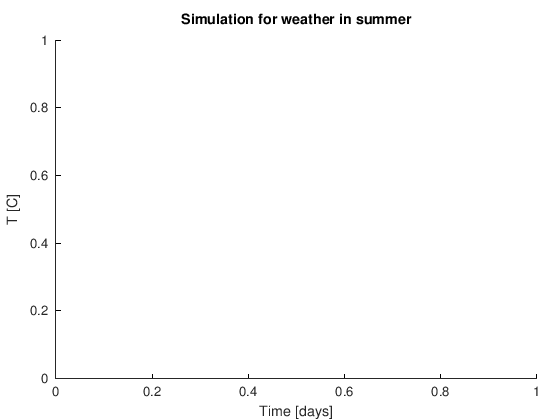

In [63]:
% Memory alocation and initial value 

n = size(Time1,1); 
thSCB = zeros(nth,n); 
thSB = zeros(nth,n);
for i = 1:nth 
thSCB(i,1)= TciS; 
thSB(i,1)= TciS;
end 

uSBp = uSB ;
ConsSCB=0;
for k = 1:n-1 
thSCB(:,k+1) = (eye(nth) + dt*As)*thSCB(:,k) + dt*Bs*uSBp(:,k); 
thSB(:,k+1)=(eye(nth) + dt*As)*thSB(:,k) + dt*Bs*uSB(:,k); 
if all([thSCB(6,k+1)> TciS, mod((k+1)*periodS/n,24)<=20,mod((k+1)*periodS/n,24)>= 7 ])
    uSBp(12,k+1)=299-2000;
    ConsSCB = ConsSCB + 2000*dt;
end
end 

ySB = Cs*thSB + Ds*uSB; 
ySCB

TotalConsoSCB_kWh = ConsSCB/3600000;
fprintf('During 2 weaks in summer, we consume %d kWH instead of %d kWH before using tinted glasses \n', TotalConsoSCB_kWh, TotalConsoSC_kWh)
%subplot(3,1,2) 
plot(Time1/(24*3600),ySCB(1,:),Time45/(24*3600),ySO(1,:),Time1/(24*3600),Temp1,[0,periodW/24],[TcminW,TcminW],[0,periodW/24],[TcmaxW,TcmaxW]) 
legend({'T_{int} with tinted glasses','T_{int} with classic glasses','T_{ext}','Comfort Tinf','Comfort Tsup'}) ;
xlabel('Time [days]'),ylabel('T [C]') 
title('Simulation for weather in summer') 

### 7.2 Results of simulation

We modelised the blinds on Design Builder and found those results : 

<img src="?.png" alt="drawing" width="600"/>

We can compare them with the previous results 

<img src="?.png" alt="drawing" width="600"/>

Here we see that the blinds help to reduce the raise of temperature in summer, in a significant maner, since we have a factor of ???? on the day of the extreme temperature. 

# 8. Conclusion